# Visualizing NLU analysis of customer messages

This notebook demonstrates visualizing the results from analyzing customer messages using Watson Natural Language Understanding.

- Import saved analysis results
- Example 1: Word clouds
- Example 2: Bar charts

## Import saved analysis results

In the [Exploring NLU](https://github.com/spackows/CASCON-2019_NLP-workshops/blob/master/notebooks/Notebook-1_Exploring-NLU.ipynb) notebook, we saved NLU results in a JSON file as a Project Asset.

To import the saved data into this notebook, click on the empty cell below and then perform these steps:
1. Open the data panel by clicking on the **Find and Add Data** icon ( <img style="margin: 0px; padding: 0px; display: inline;" src="https://github.com/spackows/CASCON-2019_NLP-workshops/raw/master/images/find-add-data-icon.png"/> )
2. Under the file named <code>NLU-results.json</code> click **Insert to code**
3. Select "Insert Credentials"

In [4]:
from ibm_botocore.client import Config
import ibm_boto3

cos = ibm_boto3.client(
    service_name='s3',
    ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials_1['ENDPOINT'])

cos.download_file(Bucket=credentials_1['BUCKET'],Key=credentials_1['FILE'],Filename=credentials_1['FILE'])

In [5]:
import json
with open( credentials_1['FILE'] ) as json_file:
    results_list = json.load(json_file)
results_list[0:3]

[{'header': '-------------------------------------------------------------',
  'message': 'Good morning can you help me upload a shapefile?',
  'actions': ['help'],
  'keywords': ['Good morning', 'shapefile'],
  'spacer': ''},
 {'header': '-------------------------------------------------------------',
  'message': 'Good night where to place my file to import it into notebook?',
  'actions': ['to place', 'to import'],
  'keywords': ['Good night', 'file', 'notebook'],
  'spacer': ''},
 {'header': '-------------------------------------------------------------',
  'message': 'hai how can i do analyze with csv file is there any tutorial on it',
  'actions': ['do', 'be'],
  'keywords': ['csv file', 'hai', 'tutorial'],
  'spacer': ''}]

## Example 1: Word clouds

Display the most common words, using the size of the word to indicate how frequently it appears.

See: [word_cloud](https://github.com/amueller/word_cloud/blob/master/README.md)

In [7]:
# The word cloud functions expect a string full of words.  We have
# lists of actions and lists of keywords, so we need to assemble 
# those lists into single strings.
#
actions_str  = ""
keywords_str = ""
for result in results_list:
    if( len(result["actions"]) > 0 ):
        actions_str += ' '.join(result["actions"]) + " "
    if( len(result["keywords"]) > 0 ):
        keywords_str += ' '.join(result["keywords"]) + " "
print( "All actions:\n" + actions_str[0:100] + "...\n" )
print( "All keywords:\n" + keywords_str[0:100] + "...\n" )

All actions:
help to place to import do be try try to edit keep download use deploy to start create be be have cr...

All keywords:
Good morning shapefile Good night file notebook csv file hai tutorial issues setup WML service Im id...



In [ ]:
!pip install wordcloud

In [9]:
# Define a helper function for plotting the word clouds
#
import matplotlib.pyplot as plt
def wordcloud_plot( details_arr ):
    num_wordclouds = len( details_arr )
    fig, axs = plt.subplots( 1, num_wordclouds, figsize=( num_wordclouds*10, 10 ) )
    if( num_wordclouds < 2 ):
        axs.imshow( details_arr[0]["wordcloud"] )
        axs.set_title( details_arr[0]["title"], fontsize=20 )
        axs.axis( "off" )
    else:
        for i in range( num_wordclouds ):
            axs[i].imshow( details_arr[i]["wordcloud"] )
            axs[i].set_title( details_arr[i]["title"], fontsize=20 )
            axs[i].axis( "off" )

In [11]:
# Create word cloud objects
#
from wordcloud import WordCloud
wordcloud_keywords = WordCloud().generate( keywords_str )
wordcloud_actions = WordCloud().generate( actions_str )

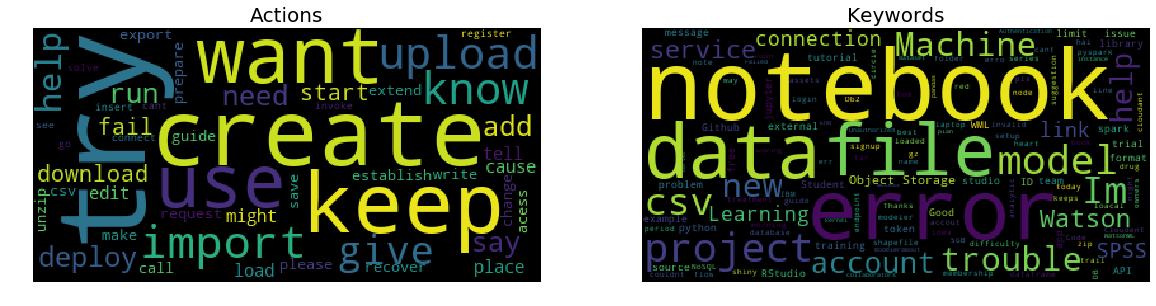

In [12]:
# Plot the word clouds
#
wordcloud_plot( [ { "title" : "Actions", "wordcloud" : wordcloud_actions },
                  { "title" : "Keywords", "wordcloud" : wordcloud_keywords } ] )

### Stop words
In the action words example, you can see words like <code>try</code>, <code>use</code>, and <code>want</code>.  Those are all _verbs_ but aren't useful from a technical analysis perspective.

From an analysis perspective, we are interested in more technical action words like <code>import</code> and <code>connect</code>.

One way to improve the word cloud is to specify ***stop words*** - words we want removed from the string before processing.

In [13]:
my_stopwords = { "try", "keep", "use", "want", "need", "know", "give", "help", "tell", "might", "cant", "say", "cause" "place" }

In [14]:
from wordcloud import STOPWORDS
wordcloud_actions = WordCloud( stopwords=STOPWORDS.union( my_stopwords ) ).generate( actions_str )

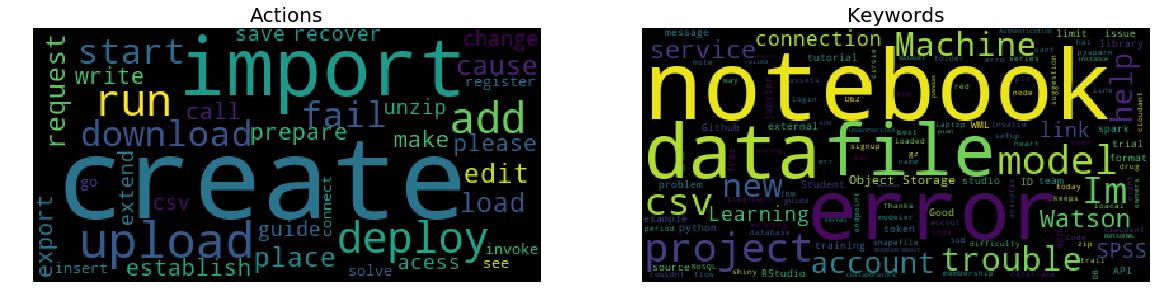

In [15]:
wordcloud_plot( [ { "title" : "Actions", "wordcloud" : wordcloud_actions },
                  { "title" : "Keywords", "wordcloud" : wordcloud_keywords } ] )

## Example 2: Bar charts

Count the important words, and then plot bar charts to show the most common words.

In [16]:
# Count the action words
#
all_actions = {}
for result in results_list:
    actions_arr = result["actions"]
    for action in actions_arr:
        if( action not in all_actions ):
            all_actions[action] = 0
        all_actions[action] += 1

common_actions = dict( [ (k,v) for k,v in all_actions.items() if v > 3 ] )

from collections import OrderedDict
ordered_common_actions = OrderedDict( sorted( common_actions.items(), key=lambda x:x[1], reverse=True ) )
ordered_common_actions

OrderedDict([('be', 13),
             ('try', 9),
             ('have', 6),
             ('get', 5),
             ('keep', 4),
             ('create', 4),
             ('keep get', 4),
             ('want', 4)])

In [17]:
# Count the keywords
#
all_keywords = {}
for result in results_list:
    keywords_arr = result["keywords"]
    for keyword in keywords_arr:
        if( keyword not in all_keywords ):
            all_keywords[keyword] = 0
        all_keywords[keyword] += 1

common_keywords = dict( [ (k,v) for k,v in all_keywords.items() if v > 3 ] )

ordered_common_keywords = OrderedDict( sorted( common_keywords.items(), key=lambda x:x[1], reverse=True ) )
ordered_common_keywords

OrderedDict([('error', 10),
             ('notebook', 8),
             ('data', 8),
             ('Im', 7),
             ('project', 5),
             ('trouble', 4),
             ('help', 4),
             ('model', 4)])

In [18]:
# Define some helper functions for plotting the word counts bar charts
#
import random
from matplotlib import colors as mcolors
import numpy as np


def random_colours( num ):
    rand_indexes = random.sample(range(0, len( mcolors.CSS4_COLORS.keys() ) - 1 ), num )
    colour_list = [ list( mcolors.CSS4_COLORS.keys() )[i] for i in rand_indexes ]
    return colour_list

def plot_words( title, ordered_words ):
    values    = ordered_words.values()
    labels    = list( ordered_words.keys() )
    num_bars  = len( labels )
    positions = np.arange( num_bars )
    colours   = random_colours( num_bars )
    
    fig, axs = plt.subplots( 1, 1, figsize=( 20, 6 ) )
    axs.bar( positions, values, color=colours, edgecolor="black" )
    plt.xticks( positions, labels ) 
    plt.tick_params( axis='both', which='major', labelsize=16)
    plt.suptitle( title, fontsize=20 )

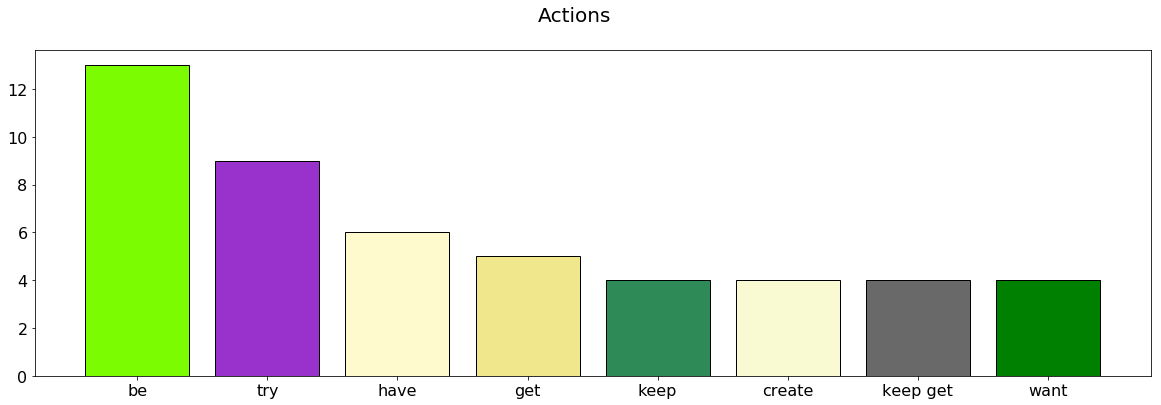

In [20]:
# Plot the "action" words
#
plot_words( "Actions", ordered_common_actions )

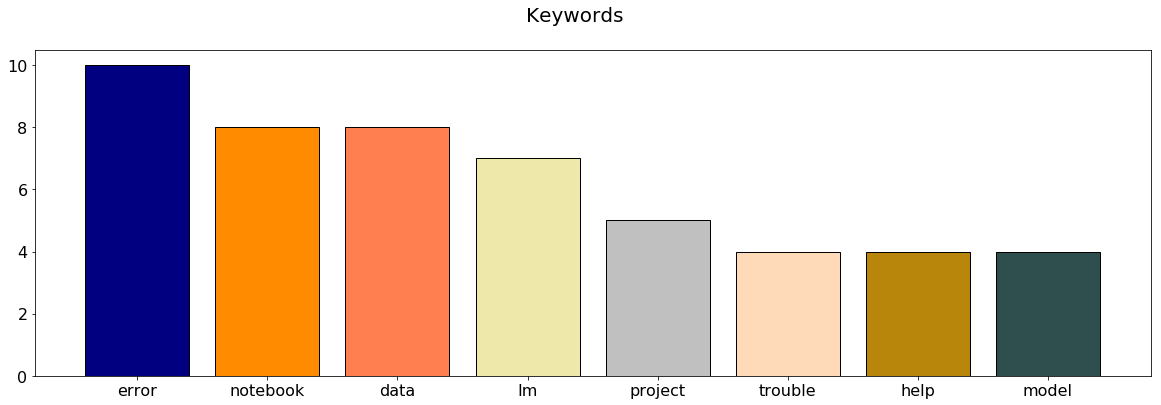

In [21]:
# Plot the keywords
#
plot_words( "Keywords", ordered_common_keywords )

## Note

As with the word clouds above, our bar chart analysis is hampered by the fact that the default NLU language models have pulled out common _verbs_ which are not technical enough for our analysis.

Our sample customer messages contain Watson Studio-specific terminology and jargon.  So, for the purposes of analyzing these sample messages, we need a custom language model that understands action words like <code>import</code> and <code>deploy</code> have special importance...

Copyright © 2019 IBM. This notebook and its source code are released under the terms of the MIT License.